# Mini Project
## MSA 8200 
### Jyotsna Jakkam, Aliya Kadeeja, Kaodi Okafor, Sirisha Pulaparthy

In [21]:
pip install --upgrade --no-deps statsmodels


     |████████████████████████████████| 9.6 MB 7.5 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import required packages

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

## Import Data / Preprocessing

### Features

In [2]:
features_df = pd.read_csv("features.csv")
print(features_df.isnull().sum())
features_df.head()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Stores

In [3]:
stores_df = pd.read_csv("stores.csv")
print(stores_df.isnull().sum())
stores_df.head()

Store    0
Type     0
Size     0
dtype: int64


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Train Data

In [4]:
train_df = pd.read_csv("train.csv")
print(train_df.isnull().sum())
train_df.head()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
print("Sales on Non-Holidays : ", train_df[train_df["IsHoliday"]==False]["Weekly_Sales"].count())
print("Sales on Holidays : ", train_df[train_df["IsHoliday"]==True]["Weekly_Sales"].count())

Sales on Non-Holidays :  391909
Sales on Holidays :  29661


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

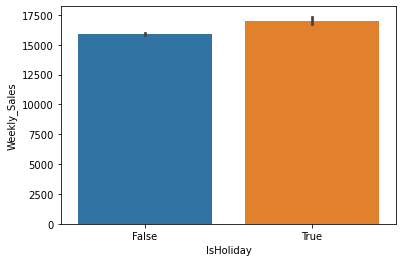

In [6]:
nonholiday_sales = train_df[train_df["IsHoliday"]==False]["Weekly_Sales"].count()
holiday_sales = train_df[train_df["IsHoliday"]==True]["Weekly_Sales"].count()
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_df)

### Test Data

In [7]:
test_df = pd.read_csv("test.csv")
print(test_df.isnull().sum())
test_df.head()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


### Merging features with training data

In [8]:
train_w_features = pd.merge_asof(train_df, features_df, on="Store", by="Date")

train_w_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
print("Total stores : ", stores_df.count()['Size'].round(1))
print("type A : ", stores_df[stores_df["Type"]=='A'].count())
print("type B : ", stores_df[stores_df["Type"]=='B'].count())
print("type C : ", stores_df[stores_df["Type"]=='C'].count())


Total stores :  45
type A :  Store    22
Type     22
Size     22
dtype: int64
type B :  Store    17
Type     17
Size     17
dtype: int64
type C :  Store    6
Type     6
Size     6
dtype: int64


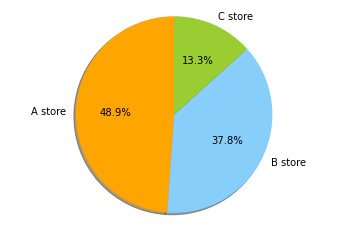

In [21]:
colors_list = ['orange', 'lightskyblue', 'yellowgreen']
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors= colors_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

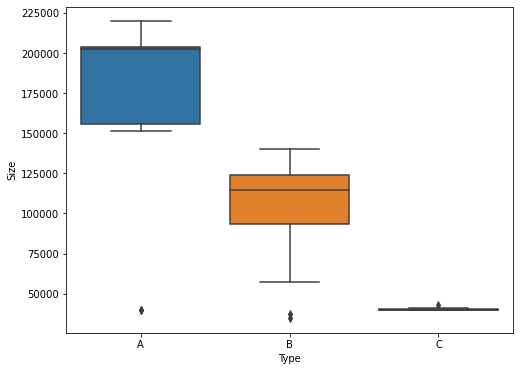

In [22]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores_df['Type'], stores_df['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=stores_df)

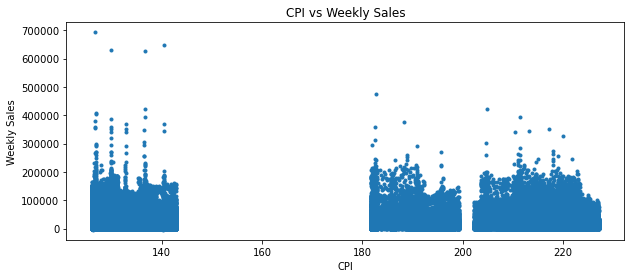

In [23]:
plt.figure(figsize=(10,4))
plt.scatter(train_w_features['CPI'], train_w_features['Weekly_Sales'], marker='.')
plt.title('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

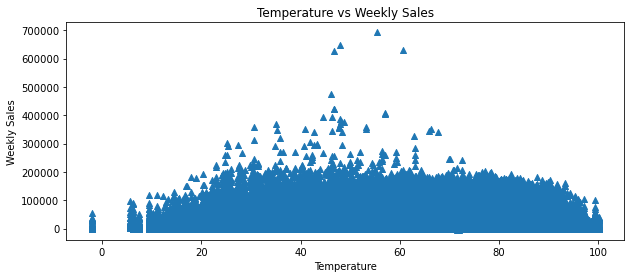

In [24]:
plt.figure(figsize=(10,4))
plt.scatter(train_w_features['Temperature'], train_w_features['Weekly_Sales'], marker='^')
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [25]:
# Set Date as Datetime
def set_datetime_column(train_df):
    train_df["Datetime"] = pd.to_datetime(train_df.Date, format='%Y-%m-%d')
    train_df.drop("Date", axis=1, inplace=True)
    train_df.rename(columns={"Datetime" : "Date"}, inplace=True)
    return train_df

# Split Date to Year, Month, Day
#def split_datetime_info(train_df):
    #df["Year"] = df.Date.dt.year
    #df["Month"] = df.Date.dt.month
    #df["Day"] = df.Date.dt.day
    #return df

/var/folders/bc/3_vc8nyx14v_gt7hfsg3hl080000gn/T/ipykernel_61799/2909746923.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # show figure


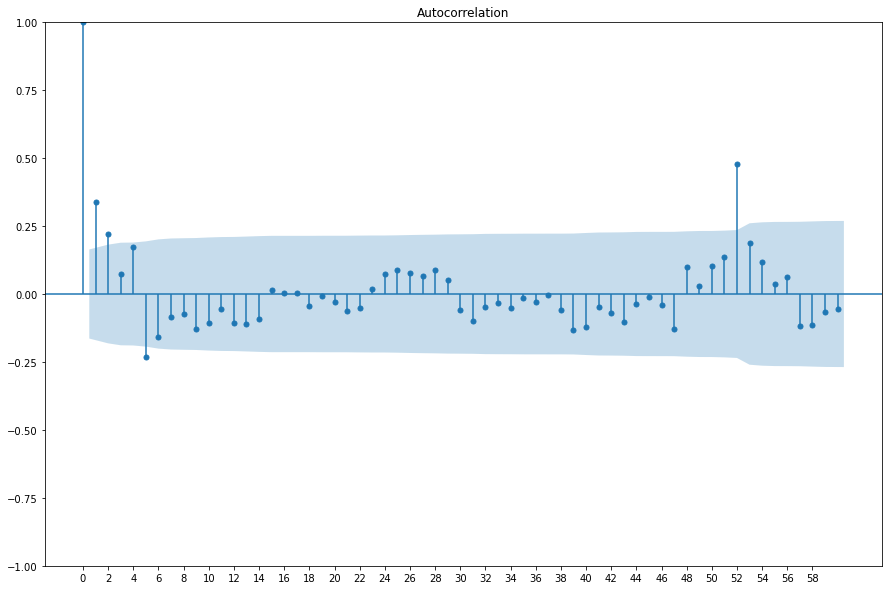

In [26]:
# Plotting ACF (Auto Correlation Function) test result, to determinate Lags 

acfplot = train_w_features.groupby(["Date"]).Weekly_Sales.sum().reset_index()
acfplot = set_datetime_column(acfplot)
acfplot = acfplot.set_index('Date')

fig, ax = plt.subplots(figsize=(15,10)) # Increase plot size
fig = sm.graphics.tsa.plot_acf(acfplot.values.squeeze(), lags=60, ax=ax) # shows ACF test result
ax.set_xticks(range(0,60, 2)) # change X axis ticks to show every 2 numbers
fig.show() # show figure

/Users/aliyakadeeja/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/var/folders/bc/3_vc8nyx14v_gt7hfsg3hl080000gn/T/ipykernel_61799/2303883313.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # show figure


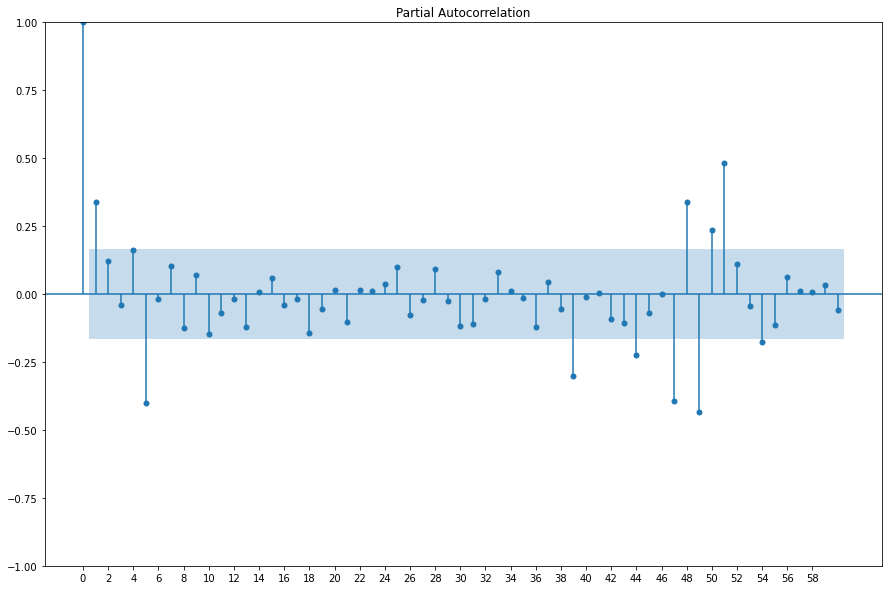

In [27]:
# Plotting PACF (Auto Correlation Function) test result, to determinate Sazonal Lags 

fig, ax = plt.subplots(figsize=(15,10)) # Increase plot size
fig = sm.graphics.tsa.plot_pacf(acfplot.values.squeeze(), lags=60, ax=ax) # shows ACF test result
ax.set_xticks(range(0,60, 2)) # change X axis ticks to show every 2 numbers
fig.show() # show figure

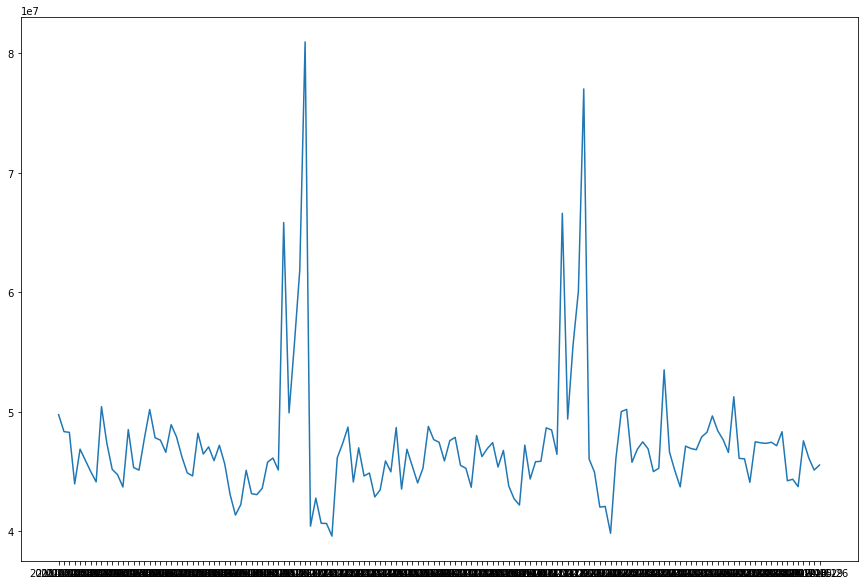

In [35]:
# grouping all week sales on dataframe
WS = train_df.groupby("Date").Weekly_Sales.sum().reset_index()
plt.figure(figsize=(15, 10))
plt.plot(WS.Date, WS.Weekly_Sales)